In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Model
from keras.layers import Dense, Dropout, Input
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import sys 
from numpy import trapz
from scipy import interp

%matplotlib inline

In [7]:
# Get the required files
df_sig = pd.read_hdf('mc16ae_Honly_sig_NN_var.h5', 'df_sig')
df_bkg = pd.read_hdf('mc16a_ggZZ_bkg_NN_var.h5','df_bkg')
#get 1 jet events
df_sig1j = df_sig[df_sig['n_jets']==1]
df_bkg1j = df_bkg[df_bkg['n_jets']==1]

In [8]:
#define the discriminant
df_sig['ME_disc_0j'] = np.log10(df_sig['ggHZZ_ME_0j']/(df_sig['ggZZ_ME_0j']+0.1*df_sig['qqZZ_ME_0j']))
df_bkg['ME_disc_0j'] = np.log10(df_bkg['ggHZZ_ME_0j']/(df_bkg['ggZZ_ME_0j']+0.1*df_bkg['qqZZ_ME_0j']))

In [15]:
# names of event-level branches
npart = ["m4l_unconstrained","ME_disc_0j","cos_theta_str","cos_theta_1","pt4l_fsr","phi","phi_1","Z1_m","Z2_m","n_jets"]


In [16]:
#get NN input variables events
df_sigIn = df_sig[["m4l_unconstrained","ME_disc_0j","cos_theta_str","cos_theta_1","pt4l_fsr","phi","phi_1","Z1_m","Z2_m","n_jets"]]
df_bkgIn = df_bkg[["m4l_unconstrained","ME_disc_0j","cos_theta_str","cos_theta_1","pt4l_fsr","phi","phi_1","Z1_m","Z2_m","n_jets"]]

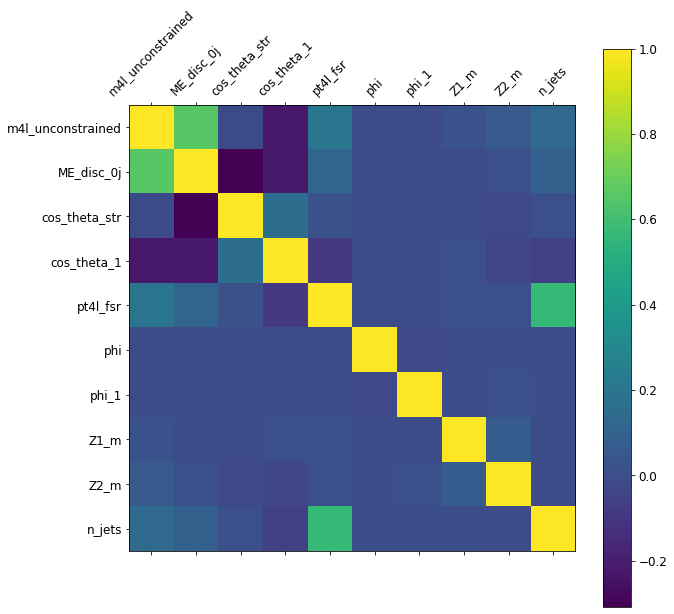

In [25]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df_sigIn.corr(), fignum=f.number)
plt.xticks(range(df_sigIn.shape[1]), df_sigIn.columns, fontsize=12, rotation=45)
plt.yticks(range(df_sigIn.shape[1]), df_sigIn.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
#plt.title('Correlation Matrix', fontsize=16);

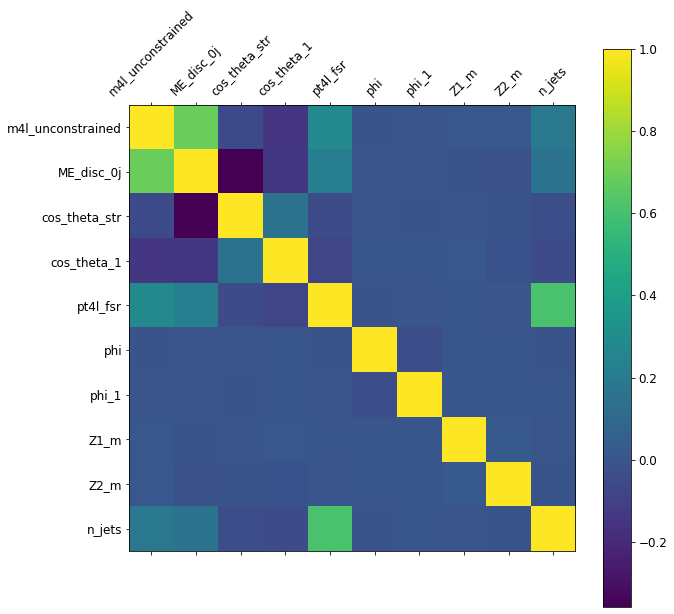

In [26]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df_bkgIn.corr(), fignum=f.number)
plt.xticks(range(df_bkgIn.shape[1]), df_bkgIn.columns, fontsize=12, rotation=45)
plt.yticks(range(df_bkgIn.shape[1]), df_bkgIn.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
#plt.title('Correlation Matrix', fontsize=16);